In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 2 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-12GB


In [2]:
# import pacakage
import os
import pandas as pd

In [3]:
# Import the train data
# Define the path to the file
file_path = './final_project_data/train.tsv'

# Load the data
train_data = pd.read_csv(file_path, delimiter='\t', header = None)
train_data = train_data.iloc[:, list(range(0,12))]
# Change the column names
train_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_data.shape[0]))
train_data.sample(10)

Number of training sentences: 10,240



,json,label,headline,subject,speaker,speaker_title,state_info,party_affiliation,barely true counts,false counts,half true counts,mostly true counts
3504,4038.json,false,Georgias illegal immigration crackdown laws sh...,"history,immigration",robert-brown,state senator,Georgia,democrat,1.0,1.0,0.0,0.0
4756,5880.json,true,Says Austin Mayor Lee Leffingwell voted for a ...,transportation,brigid-shea,"Principal, Carbon Shrinks LLC",Texas,democrat,0.0,0.0,1.0,1.0
10227,13344.json,pants-fire,"Recently though, the media has reported on tho...",elections,john-rafferty,State Senator,Pennsylvania,republican,0.0,0.0,0.0,0.0
3045,8816.json,true,The national economic recovery has led to high...,"state-budget,state-finances,states",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,2.0,2.0
10087,10239.json,barely-true,"Keystone XL allows Canada to pump their oil, s...","energy,gas-prices",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0
6519,10119.json,mostly-true,Says Jeanne Shaheen has voted with the preside...,bipartisanship,scott-brown,NaN,New Hampshire,republican,2.0,2.0,1.0,3.0
5868,11174.json,mostly-true,A majority of the candidates on this stage hav...,"candidates-biography,immigration",ted-cruz,Senator,Texas,republican,36.0,33.0,15.0,19.0
4901,12675.json,half-true,Independent analysts say (Donald Trump) would ...,"debt,deficit,economy",hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0
728,8850.json,mostly-true,Nearly 90% of Travis County government races w...,"county-government,elections",wayne-thorburn,NaN,NaN,republican,0.0,0.0,0.0,1.0
713,5590.json,false,Says the No. 2 cause of death in the U.S. (for...,"crime,families,women",rod-monroe,State Senator,Oregon,democrat,0.0,2.0,0.0,0.0


In [4]:
# To clean the data, some of the headline include the json and other features.
train_data = train_data[train_data['headline'].str.len() <= 256]

In [5]:
# Import the val data
# Define the path to the file
file_path = './final_project_data/valid.tsv'

# Load the data
val_data = pd.read_csv(file_path, delimiter='\t', header = None)
val_data = val_data.iloc[:, list(range(0,12))]
# Change the column names
val_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']


In [6]:
file_path = './final_project_data/test.tsv'

# Load the data
test_data = pd.read_csv(file_path, delimiter='\t', header = None)
test_data = test_data.iloc[:, list(range(0,12))]
# Change the column names
test_data.columns = ['json', 'label', 'headline', 'subject', 'speaker', 'speaker_title', 'state_info', 'party_affiliation','barely true counts', 'false counts', 'half true counts','mostly true counts']


In [7]:
# To clean the data, some of the headline include the json and other features.
val_data = val_data[val_data['headline'].str.len() <= 256]

In [8]:
test_data = test_data[test_data['headline'].str.len() <= 256]

In [9]:
unique_labels = train_data.label.unique()

print(unique_labels)

['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


In [10]:
# Get the unique value of label
unique_labels = val_data.label.unique()

print(unique_labels)

['barely-true' 'pants-fire' 'false' 'half-true' 'true' 'mostly-true']


In [11]:
# Remove rows with 'pants-fire' label
# train_data = train_data[train_data['label'] != 'pants-fire'].reset_index(drop = True).copy()
# val_data = val_data[val_data['label'] != 'pants-fire'].reset_index(drop = True).copy()

# Update 'pants-fire' labels to 'true' in the train_data DataFrame
train_data.loc[train_data['label'] == 'pants-fire', 'label'] = 'false'

# Update 'pants-fire' labels to 'true' in the val_data DataFrame
val_data.loc[val_data['label'] == 'pants-fire', 'label'] = 'false'

test_data.loc[test_data['label'] == 'pants-fire', 'label'] = 'false'

# Reset the index and create a copy of the updated DataFrames
train_data = train_data.reset_index(drop=True).copy()
val_data = val_data.reset_index(drop=True).copy()
test_data = test_data.reset_index(drop=True).copy()


# Label value should be numerical
label_mapping = {
    'false': 0,
    'true': 1,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4
}

train_data['label'] = train_data['label'].map(label_mapping)
val_data['label'] = val_data['label'].map(label_mapping)
test_data['label'] = test_data['label'].map(label_mapping)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train_data.shape[0]))
print('Number of training sentences: {:,}\n'.format(val_data.shape[0]))
print(train_data.head())

Number of training sentences: 10,184

Number of training sentences: 1,278

         json  label                                           headline  \
0   2635.json      0  Says the Annies List political group supports ...   
1  10540.json      3  When did the decline of coal start? It started...   
2    324.json      4  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json      0  Health care reform legislation is likely to ma...   
4   9028.json      3  The economic turnaround started at the end of ...   

                              subject         speaker         speaker_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   


## Tokenization

In [12]:
# Get the lists of sentences and their labels.
train_headline = train_data.headline.values
train_labels = train_data.label.values

test_headline = test_data.headline.values
test_labels = test_data.label.values

val_headline = val_data.headline.values
val_labels = val_data.label.values

In [13]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel# AutoTokenizer, AutoModelForCausalLM

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

max_len = 0

# For every headline...
for sent in train_headline:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    train_input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    train_max_len = max(max_len, len(train_input_ids))

# For every headline...
for sent in val_headline:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    val_input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    val_max_len = max(max_len, len(val_input_ids))


# For every headline...
for sent in test_headline:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    test_input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    test_max_len = max(max_len, len(test_input_ids))

print('Max sentence length for training set: ', train_max_len)
print('Max sentence length for validation set: ', val_max_len)

/projectnb/cs505ws/students/seunghee/.conda/envs/cs505_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Max sentence length for training set:  35
Max sentence length for validation set:  20


In [14]:
num = 0
for sent in train_headline:
  if len(sent) >= 512:
    num += 1
    print(num, sent)

print(f"The number of max_len > 512: '{num}'")

The number of max_len > 512: '0'


In [15]:
import torch
from transformers import GPT2Tokenizer
from transformers import DataCollatorForLanguageModeling

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
# Assuming train_headline is a list of sentences
# Replace NaN values in 'subject' with 'Not Specified'
train_data['subject'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker' with 'Not Specified'
train_data['speaker'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker_title' with 'Not Specified'
train_data['speaker_title'].fillna('Not Specified', inplace=True)

# Concatenate the headline, subject, speaker and spearker_title
train_data['headline_full'] = (train_data['headline'] + 
                               " Subject: " + train_data['subject'] + "." +
                               " Speaker: " + train_data['speaker'] + "." +
                               " Speaker title: " + train_data['speaker_title'] + ".")

train_headline_full = train_data.headline_full.values


train_input_ids = []
train_attention_masks = []

# Tokenize each sentence
for sent in train_headline_full:
    encoded_dict = tokenizer.encode_plus(
                        sent,                           # Sentence to encode
                        max_length=256,                 # Pad & truncate all sentences
                        padding='max_length',           # Pad to max_length
                        return_attention_mask=True,     # Return attention mask
                        return_tensors='pt',            # Return PyTorch tensors
                        truncation=True
                    )

    train_input_ids.append(encoded_dict['input_ids'])
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)  # Assuming train_labels is defined

# Example output
print('Original: ', train_headline_full[0])
print('Token IDs:', train_input_ids[0])


2023-12-22 16:51:54.607279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 16:51:54.607319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 16:51:54.608649: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 16:51:54.616442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 16:51:56.673062: W tensorflow/compiler/tf2

Original:  Says the Annies List political group supports third-trimester abortions on demand. Subject: abortion. Speaker: dwayne-bohac. Speaker title: State representative.
Token IDs: tensor([   50,   592,   262,  5506,   444,  7343,  1964,  1448,  6971,  2368,
           12,  2213, 47484, 19985,   319,  3512,    13, 15540,    25,  7950,
           13, 14931,    25,   288, 43932,    12,    65,  1219,   330,    13,
        14931,  3670,    25,  1812,  8852,    13, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 

In [22]:
# Tokenize all of the headline and map the tokens to thier word IDs.
val_input_ids = []
val_attention_masks = []

val_data['subject'].fillna('Not Specified', inplace=True)
val_data['speaker'].fillna('Not Specified', inplace=True)
val_data['speaker_title'].fillna('Not Specified', inplace=True)
val_data['headline_full'] = (val_data['headline'] + 
                               " Subject: " + val_data['subject'] + "." +
                               " Speaker: " + val_data['speaker'] + "." +
                               " Speaker title: " + val_data['speaker_title'] + ".")
val_headline_full = val_data.headline_full.values

# For every sentence...
for sent in val_headline_full:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    val_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)
val_labels = torch.tensor(val_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', val_headline_full[0])
print('Token IDs:', val_input_ids[0])

/projectnb/cs505ws/students/seunghee/.conda/envs/cs505_1/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  We have less Americans working now than in the 70s. Subject: economy,jobs. Speaker: vicky-hartzler. Speaker title: U.S. Representative.
Token IDs: tensor([ 1135,   423,  1342,  3399,  1762,   783,   621,   287,   262,  4317,
           82,    13, 15540,    25,  3773,    11, 43863,    13, 14931,    25,
          410, 17479,    12,    71, 13636,  1754,    13, 14931,  3670,    25,
          471,    13,    50,    13, 19920,    13, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256

In [16]:
# Tokenize all of the headline and map the tokens to thier word IDs.
test_input_ids = []
test_attention_masks = []

test_data['subject'].fillna('Not Specified', inplace=True)
test_data['speaker'].fillna('Not Specified', inplace=True)
test_data['speaker_title'].fillna('Not Specified', inplace=True)
test_data['headline_full'] = (test_data['headline'] + 
                               " Subject: " + test_data['subject'] + "." +
                               " Speaker: " + test_data['speaker'] + "." +
                               " Speaker title: " + test_data['speaker_title'] + ".")
test_headline_full = test_data.headline_full.values

# For every sentence...
for sent in test_headline_full:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )

    # Add the encoded sentence to the list.
    test_input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', test_headline_full[0])
print('Token IDs:', test_input_ids[0])

/projectnb/cs505ws/students/seunghee/.conda/envs/cs505_1/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Building a wall on the U.S.-Mexico border will take literally years. Subject: immigration. Speaker: rick-perry. Speaker title: Governor.
Token IDs: tensor([25954,   257,  3355,   319,   262,   471,    13,    50,  7874, 33006,
         4865,   481,  1011,  7360,   812,    13, 15540,    25,  6272,    13,
        14931,    25,   374,   624,    12,   525,   563,    13, 14931,  3670,
           25, 10807,    13, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 5025

In [15]:
train_labels

tensor([0, 3, 4,  ..., 3, 0, 0])

## Train and Validation

In [23]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # GPT-2 uses the EOS token as padding

# Load the model
num_labels = 5  # Adjust this based on your task
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=num_labels).to(device)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model.config.pad_token_id = tokenizer.pad_token_id

In [25]:
print(model.config.pad_token_id)

50256


In [26]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

class TextDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }


In [27]:
# Assuming train_input_ids, train_attention_masks, and train_labels are available
# batch = next(iter(train_dataloader))

train_dataset = TextDataset(train_input_ids, train_attention_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Assuming train_input_ids, train_attention_masks, and train_labels are available
val_dataset = TextDataset(val_input_ids, val_attention_masks, val_labels)
validation_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True)

test_dataset = TextDataset(test_input_ids, test_attention_masks, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)


In [28]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [29]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/projectnb/cs505ws/students/seunghee/.conda/envs/cs505_1/lib/python3.9/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [30]:
import random
from tqdm import tqdm
num_epochs = 4

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

for epoch in tqdm(range(num_epochs)):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, num_epochs))
    print('Training...')
    model.train()
    total_train_loss = 0
    total_train_accuracy = 0
    total_batches = 0
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}

        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        logits = outputs.logits
        # Backward pass
        model.zero_grad()
        loss.backward()
        optimizer.step()
        # Accumulate the training loss and accuracy
        total_train_loss += loss.item()
        # accuracy = compute_accuracy(logits, batch['labels'])
        # total_accuracy += accuracy.item()
        total_batches += 1

    # Calculate the average loss and accuracy over the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    # avg_train_accuracy = total_accuracy / len(train_dataloader)

    print("")
    print("Average training loss: {0:.2f}".format(avg_train_loss))

    # print(f"Average Training Loss: {avg_train_loss:.2f}, Average Training Accuracy: {avg_train_accuracy:.2f}")

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in validation_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits
    
        loss = outputs.loss
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = batch['labels'].to('cpu').numpy()
        
        #accuracy = compute_accuracy(logits, batch['labels'])
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    
        # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Loss: {0:.2f}".format(avg_val_loss))
    print(f"Validation Accuracy: {avg_val_accuracy}")

        # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            # 'Training Time': training_time,
            # 'Validation Time': validation_time
        }
    )

torch.save(model, 'model.pth')

print("")
print("Training complete!")




  0%|          | 0/4 [00:00<?, ?it/s]


======== Epoch 1 / 4 ========
Training...

Average training loss: 1.64

Running Validation...


 25%|██▌       | 1/4 [05:16<15:49, 316.52s/it]

Validation Loss: 1.57
Validation Accuracy: 0.30267857142857146

======== Epoch 2 / 4 ========
Training...

Average training loss: 1.56

Running Validation...


 50%|█████     | 2/4 [10:33<10:33, 316.55s/it]

Validation Loss: 1.51
Validation Accuracy: 0.33515625

======== Epoch 3 / 4 ========
Training...

Average training loss: 1.52

Running Validation...


 75%|███████▌  | 3/4 [15:49<05:16, 316.71s/it]

Validation Loss: 1.51
Validation Accuracy: 0.3410714285714286

======== Epoch 4 / 4 ========
Training...

Average training loss: 1.48

Running Validation...


100%|██████████| 4/4 [21:06<00:00, 316.74s/it]

Validation Loss: 1.47
Validation Accuracy: 0.36529017857142854



Training complete!


In [31]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.
epoch,,,
1,1.64,1.57,0.30
2,1.56,1.51,0.34
3,1.52,1.51,0.34
4,1.48,1.47,0.37


In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss with Headline + Subject + Speaker + Speaker_Title No SEP Token")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [29]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in test_dataloader:
  # Add batch to GPU
    
  batch = {k: v.to(device) for k, v in batch.items()}

  # Unpack the inputs from our dataloader
  b_input_ids = batch['input_ids']
  b_input_mask = batch['attention_mask']
  b_labels = batch['labels']  # or 'label' depending on how your dataloader is set up

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,260 test sentences...
    DONE.


In [31]:
import torch
import torch.nn.functional as F
import numpy as np

# Convert logits to class labels
y_pred = [np.argmax(F.softmax(torch.from_numpy(batch_logits), dim=1).numpy(), axis=1) for batch_logits in predictions]
y_pred = np.concatenate(y_pred, axis=0)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_true = test_labels
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy for each class
class_accuracies = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracies):
    print(f"Accuracy of Class {i}: {acc}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy}")

Accuracy of Class 0: 0.3489736070381232
Accuracy of Class 1: 0.10194174757281553
Accuracy of Class 2: 0.014218009478672985
Accuracy of Class 3: 0.32950191570881227
Accuracy of Class 4: 0.25311203319502074
Overall Accuracy: 0.23015873015873015


## Try With the SEP token between each sentences

In [16]:
# Get the lists of sentences and their labels.
train_headline = train_data.headline.values
train_labels = train_data.label.values
train_speaker = train_data.speaker.values
train_subject = train_data.subject.values

val_headline = val_data.headline.values
val_labels = val_data.label.values
val_speaker = val_data.speaker.values
val_subject = val_data.subject.values

In [16]:
import torch
from transformers import GPT2Tokenizer
from transformers import DataCollatorForLanguageModeling

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
# Assuming train_headline is a list of sentences
train_input_ids = []
train_attention_masks = []


train_data['subject'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker' with 'Not Specified'
train_data['speaker'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker_title' with 'Not Specified'
train_data['speaker_title'].fillna('Not Specified', inplace=True)

# Concatenate the headline, subject, speaker and spearker_title

pair_sentences_train = list(zip(train_data['headline'], train_data['subject'], train_data['speaker'], train_data['speaker_title']))

# Tokenize each sentence
for (headline, subject, speaker, speaker_title) in pair_sentences_train:
    combined_sentence = headline + tokenizer.eos_token + subject + tokenizer.eos_token + speaker + tokenizer.eos_token + speaker_title
    encoded_dict = tokenizer.encode_plus(
                        combined_sentence,                           # Sentence to encode
                        max_length=256,                 # Pad & truncate all sentences
                        padding='max_length',           # Pad to max_length
                        return_attention_mask=True,     # Return attention mask
                        return_tensors='pt',            # Return PyTorch tensors
                        truncation=True
                    )

    train_input_ids.append(encoded_dict['input_ids'])
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)  # Assuming train_labels is defined

# Example output
print('Original: ', train_headline[0])
print("Originial subject:", train_subject[0] )
print('Token IDs:', train_input_ids[0])

Original:  Says the Annies List political group supports third-trimester abortions on demand.
Originial subject: abortion
Token IDs: tensor([   50,   592,   262,  5506,   444,  7343,  1964,  1448,  6971,  2368,
           12,  2213, 47484, 19985,   319,  3512,    13, 50256, 32396, 50256,
           67, 43932,    12,    65,  1219,   330, 50256,  9012,  8852, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        5

In [17]:
import torch
from transformers import GPT2Tokenizer
from transformers import DataCollatorForLanguageModeling

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
# Assuming train_headline is a list of sentences
val_input_ids = []
val_attention_masks = []


val_data['subject'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker' with 'Not Specified'
val_data['speaker'].fillna('Not Specified', inplace=True)

# Replace NaN values in 'speaker_title' with 'Not Specified'
val_data['speaker_title'].fillna('Not Specified', inplace=True)

# Concatenate the headline, subject, speaker and spearker_title

pair_sentences_val = list(zip(val_data['headline'], val_data['subject'], val_data['speaker'], val_data['speaker_title']))

# Tokenize each sentence
for (headline, subject, speaker, speaker_title) in pair_sentences_val:
    combined_sentence = headline + tokenizer.eos_token + subject + tokenizer.eos_token + speaker + tokenizer.eos_token + speaker_title
    encoded_dict = tokenizer.encode_plus(
                        combined_sentence,                           # Sentence to encode
                        max_length=256,                 # Pad & truncate all sentences
                        padding='max_length',           # Pad to max_length
                        return_attention_mask=True,     # Return attention mask
                        return_tensors='pt',            # Return PyTorch tensors
                        truncation=True
                    )

    val_input_ids.append(encoded_dict['input_ids'])
    val_attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)
val_labels = torch.tensor(val_labels)  # Assuming train_labels is defined

# Example output
print('Original: ', val_headline[0])
print("Originial subject:", val_subject[0] )
print('Token IDs:', val_input_ids[0])

Original:  We have less Americans working now than in the 70s.
Originial subject: economy,jobs
Token IDs: tensor([ 1135,   423,  1342,  3399,  1762,   783,   621,   287,   262,  4317,
           82,    13, 50256, 13926,    88,    11, 43863, 50256,    85, 17479,
           12,    71, 13636,  1754, 50256,    52,    13,    50,    13, 19920,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 

In [18]:
# Assuming train_input_ids, train_attention_masks, and train_labels are available
train_dataset = TextDataset(train_input_ids, train_attention_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Assuming train_input_ids, train_attention_masks, and train_labels are available
val_dataset = TextDataset(val_input_ids, val_attention_masks, val_labels)
validation_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [19]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # GPT-2 uses the EOS token as padding

# Load the model
num_labels = 5  # Adjust this based on your task
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=num_labels).to(device)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.config.pad_token_id = tokenizer.pad_token_id

In [21]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/projectnb/cs505ws/students/seunghee/.conda/envs/cs505_1/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [25]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [26]:
import random
import numpy as np
from tqdm import tqdm
num_epochs = 4

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

for epoch in tqdm(range(num_epochs)):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, num_epochs))
    print('Training...')
    model.train()
    total_train_loss = 0
    total_train_accuracy = 0
    total_batches = 0
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}

        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        logits = outputs.logits
        # Backward pass
        model.zero_grad()
        loss.backward()
        optimizer.step()
        # Accumulate the training loss and accuracy
        total_train_loss += loss.item()
        # accuracy = compute_accuracy(logits, batch['labels'])
        # total_accuracy += accuracy.item()
        total_batches += 1

    # Calculate the average loss and accuracy over the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    # avg_train_accuracy = total_accuracy / len(train_dataloader)

    print("")
    print("Average training loss: {0:.2f}".format(avg_train_loss))

    # print(f"Average Training Loss: {avg_train_loss:.2f}, Average Training Accuracy: {avg_train_accuracy:.2f}")

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in validation_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits
    
        loss = outputs.loss
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = batch['labels'].to('cpu').numpy()
        
        #accuracy = compute_accuracy(logits, batch['labels'])
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    
        # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Loss: {0:.2f}".format(avg_val_loss))
    print(f"Validation Accuracy: {avg_val_accuracy}")

        # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            # 'Training Time': training_time,
            # 'Validation Time': validation_time
        }
    )


print("")
print("Training complete!")



  0%|          | 0/4 [00:00<?, ?it/s]


======== Epoch 1 / 4 ========
Training...

Average training loss: 1.61

Running Validation...


 25%|██▌       | 1/4 [02:16<06:48, 136.03s/it]

Validation Loss: 1.58
Validation Accuracy: 0.2402604166666667

======== Epoch 2 / 4 ========
Training...

Average training loss: 1.57

Running Validation...


 50%|█████     | 2/4 [04:32<04:33, 136.55s/it]

Validation Loss: 1.57
Validation Accuracy: 0.2722916666666667

======== Epoch 3 / 4 ========
Training...

Average training loss: 1.54

Running Validation...


 75%|███████▌  | 3/4 [06:49<02:16, 136.73s/it]

Validation Loss: 1.57
Validation Accuracy: 0.2658333333333333

======== Epoch 4 / 4 ========
Training...

Average training loss: 1.49

Running Validation...


100%|██████████| 4/4 [09:06<00:00, 136.70s/it]

Validation Loss: 1.56
Validation Accuracy: 0.28088541666666667

Training complete!


In [27]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.
epoch,,,
1,1.61,1.58,0.24
2,1.57,1.57,0.27
3,1.54,1.57,0.27
4,1.49,1.56,0.28


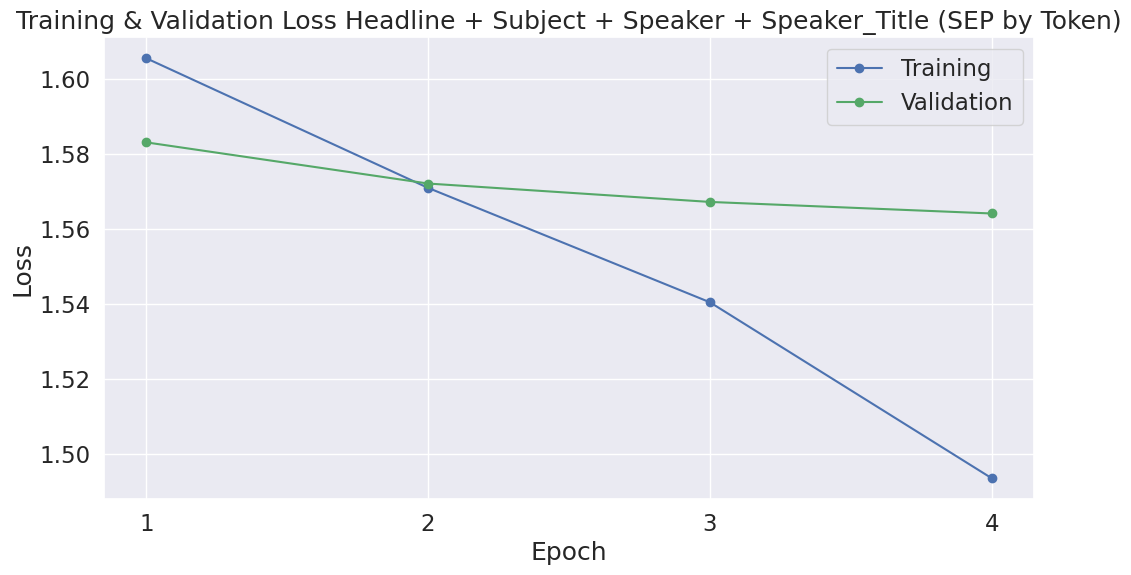

In [30]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss Headline + Subject + Speaker + Speaker_Title (SEP by Token)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()